In [3]:
import numpy as np
import matplotlib.pyplot as plt

### b) Prediction:
Consider the signal
$$y(n) = 
\begin{cases} 
    e^{-an}\cos(n \omega_0) &n \geq 0 \\
    0 &n < 0
\end{cases}
$$

where $a = 0.05$ and $\omega_0 = 0.3\pi$ . Consider also a (rectangular) windowed
version of this signal

$$\hat{y}^R_M(n) = 
\begin{cases} 
    y(n) &-M \leq n \leq M \\
    0 &\text{elsewhere}
\end{cases}
$$

where $M = 128$ (i.e. rectangular window of length $2M+ 1$ centered at $n = 0$).
Finally, consider a 2-term LPC predictor $A(z) = a_1z^{-1} + a_2z^{-2}$ so that we try
to predict a signal $y(n)$ as $y_{\text{predict}}(n) = a_1y(n-1) + a_2y(n-2)$.

<b> 1. Define the excitation (ie. prediction error) $x(n)$ as $x(n) = y(n) - y_{\text{predict}}(n)$.
Show for arbitrary signals $y(n)$ that the transfer function relating $x(n)$ to
$y(n)$ is equal to $1/(1- a_1z^{-1} - a_2z^{-2})$. This transfer function can in general
have two complex poles (i.e. the denominator is quadratic in $z^{-1}$).
Assume that the poles are complex conjugates of each other (i.e. one
pole is $c = re^{j\theta}$ and the other is $c^* = re^{-j\theta}$) and determine $a_1$ and $a_2$ in terms
of $r, \theta$. </b>

Let $x(n) = y(n) - y_{\text{predict}}(n)$, substituting $y_{\text{predict}}(n)$ in $x(n)$ we have

\begin{equation*}
    x(n) = y(n) - a_1y(n-1) - a_2y(n-2).
\end{equation*}

We apply the Z-transform in $x(n)$, yielding

\begin{equation*}
    X(z) = Y(z) - a_1z^{-1}Y(z) - a_2z^{-2}Y(z).
\end{equation*}

Grouping the $Y(z)$ and isolating the $z^{-1}$ terms, yields

\begin{equation*}
    \frac{Y(z)}{X(z)} =  \frac{1}{1 -a_1z^{-1} - a_2z^{-2}}.
\end{equation*}

The poles of the function are found when the denominator equals zero, so

\begin{equation*}
    1 -a_1z^{-1} - a_2z^{-2} = 0, 
\end{equation*}

or, working with positive power of $z$

\begin{equation*}
    z^2 -a_1z - a_2 = 0.
\end{equation*}

Applying the quadratic factoring formula we find that $a_1 = 2r\cos(\theta)$ and $a_2 = -r^2$.


<b> 2. Take the z-transform (see Chapter 5) of our specific $y(n)$ and relate $r, \theta$
to $a, \omega_0$ by identifying the pole locations of $y(n)$. Given $r, \theta$ we also
know $a_1, a_2$ (from part 1), so calculate the prediction error $x(n)$ for our
two-point predictor applied to our $y(n)$ using its true pole locations. </b>

The Z-transform of $y(n)$  is given by

\begin{equation*}
    Y(z) = \frac{z - \cos(\omega_0)e^{-a}}{z^2 - 2\cos(\omega_0)e^{-a}z + e^{-2a}}.
\end{equation*}

In that form, we have $a_1 = 2\cos(\omega_0)e^{-a}$ and $a_2 = e^{-2a}$. Comparing with the prior results, it is clear that $r=e^{-a}$ and $\theta = \omega_0$.

In [11]:
a = 0.05
w_0 = 0.3 * np.pi
r = np.exp(-a)
theta = w_0
a1 = 2 * r * np.cos(theta)
a2 = -r ** 2

In [12]:
n = np.linspace(0, 300, 300)
y = np.exp(-a * n) * np.cos(w_0 * n)
y[-1], y[-2] = 0, 0
y_pred = np.zeros(y.shape)
x = np.zeros(y.shape)
    
for i in range(-2, len(n)):
    y_pred[i] = a1 * y[i-1] + a2 * y[i-2]
    x[i] = y[i] - y_pred[i]

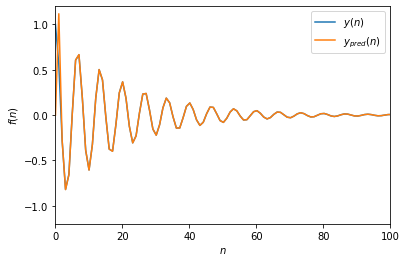

In [13]:
plt.plot(n, y, label='$y(n)$')
plt.plot(n, y_pred, label='$y_{pred}(n)$')
#plt.plot(n, x, label='$x(n)$')
plt.axis([0, 100, -1.2, 1.2])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend()

<b> 3. Use the z-transform of $y(n)$ to calculate the Fourier Transform of $y(n)$
(i.e. $Y(\omega)$ is the z-transform evaluated at $z = e^{j\omega}$ and graph $|Y(\omega)|^2$.
Take a close-up look at the positive frequency pole and fit a Lorentzian
to the peak of the form

$$L(\omega) = \frac{K}{A^2 + (\omega - W)^2} $$

where $A, W, K$ are constants to fit by eye, analytical calculation, or
numerical fitting. What is your best fit for $A, W, K$? Show a close-up
graph at your fit vs. $|Y(\omega)|^2$ at the peak. How do you think $A, W$ relate
to $a, \omega_0$?</b>

In [14]:
w = np.linspace(-np.pi, np.pi, 10000)

Plugging $e^{j\omega}$ in $z$:

In [15]:
Y = (np.exp(1j * w) - np.cos(w_0) * np.exp(-a)) / (np.exp(1j * w) ** 2 - 2 * np.cos(w_0) * np.exp(-a) * np.exp(1j * w) + np.exp(-2 * a))

Fitting the parameters by eye we have:

In [16]:
K = 0.31
A = 0.053
W = 0.944
L = K / (A ** 2 + (w - W) ** 2);

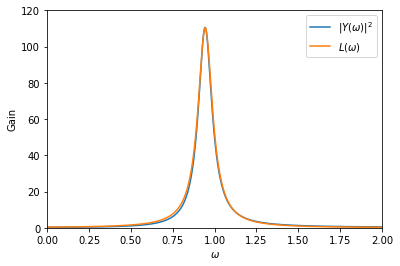

In [160]:
plt.plot(w, np.abs(Y) ** 2, label='$|Y(\omega)|^2$')
plt.plot(w, L, label='$L(\omega)$')
plt.axis([0, 2, 0, 120])
plt.xlabel('$\omega$')
plt.ylabel('Gain')
plt.legend()

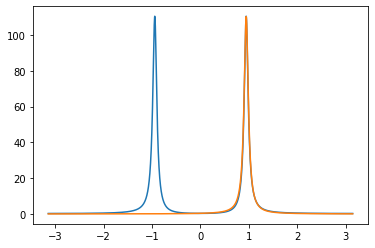

In [161]:
plt.plot(w, np.abs(Y) ** 2)
plt.plot(w, L)

The constant $W$ relates to $\omega_0$ in a way that $W$ controls the frequency axis position of the Lorentzian peak and $\omega_0$ controls the $y(n)$ center frequency. This is easy to see for $y(n)$ as the oscilating part of it is controlled by the cosine of $\omega_0$ angular frequency, wich puts a delta in frequency domain centered at the positive and negative $\omega_0$. Similarly, when $\omega=W$, the quadratic term in $L$ cancels out, yielding a much lower denominator, contributing to the production of a peak.

In $L$, $A$ regulates the peak amplitude and spread, the same way as $a$ does for $Y(\omega)$. This is expected as both of them are constants in the denominator of the functions. Moreover, $A$ relates to $a$ in an equality form, as they both approximate the value 0.05.

<b> 4. Define the prediction error energy as 

$$E = \sum_{n=-\infty}^{\infty}(y(n) - y_{\text{predict}}(n))^2$$

Substitute $y_{\text{predict}}(n) = a_1y(n-1) + a_2y(n-2)$ and write $E$ as a quadratic
function of $a_1$ and $a_2$. An alternative approach to that of part 2 for
finding the predictor coefficients is to minimize $E(a_1,a_2)$ w.r.t. $a_1$ and $a_2$.
Do this by setting both

$$\frac{\partial E}{\partial a_1} = 0$$  
$$\frac{\partial E}{\partial a_2} = 0$$

Write the result as a matrix equation for

$$\bar{x} = [a_1 \; a_2]^T$$

in terms of the matrix elements

$$\phi(k,l) \equiv \sum_{n=-\infty}^{\infty} y(n-k)y(n-l)$$ </b>

Rewriting $E$ as

\begin{align*}
    E &= \sum_{n=-\infty}^{\infty}(y(n) - (a_1y(n-1) + a_2y(n-2)))^2 \\
      &= \sum_{n=-\infty}^{\infty}y^2(n) -2y(n)(a_1y(n-1) + a_2y(n-2)) + (a_1y(n-1) + a_2y(n-2))^2 \\
      &= \sum_{n=-\infty}^{\infty}y^2(n) - 2a_1y(n)y(n-1) - 2a_2y(n)y(n-2) + a_1^2y^2(n-1) + 2a_1a_2y(n-1)y(n-2) + a_2^2y^2(n-2)
\end{align*}

Applying $\frac{\partial }{\partial a_1}$ to $E$ yields

\begin{align*}
    \frac{\partial E}{\partial a_1} = \sum_{n=\infty}^{\infty} -2y(n)y(n-1) + 2a_1y^2(n-1) + 2a_2y(n-1)y(n-2)
\end{align*}

and assuming that $\frac{\partial E}{\partial a_1} = 0$ we have

\begin{align*}
    \sum_{n=-\infty}^{\infty}y(n)y(n-1) = \sum_{n=\infty}^{\infty}a_1y^2(n-1) + a_2y(n-1)y(n-2)
\end{align*}

Which can be written as

\begin{equation*}
    \phi(0,1) = a_1\phi(1,1) + a_2\phi(1,2) .
\end{equation*}

Analogously, for $\frac{\partial }{\partial a_2}$, we have 

\begin{equation*}
    \phi(0,2) = a_1\phi(2,1) + a_2\phi(2,2) .
\end{equation*}

Or, in matrix form

\begin{equation*}
    \Phi_y = \Phi_x \bar{x}
\end{equation*}

where $\Phi_y$ = 
$\begin{bmatrix}
\phi(0,1)\\
\phi(0,2)
\end{bmatrix}$
and $\Phi_x$ =
$\begin{bmatrix}
\phi(1,1) & \phi(1,2) \\
\phi(2,1) & \phi(2,2) 
\end{bmatrix}$.

<b> 5. Obviously we can't actually calculate $\phi(k,l)$ values since they require us
to use infinite length signals. We can, however, calculate a windowed
approximation to $\phi(k,l)$ using our windowed (and zero padded) signal $\hat{y}^R_M(n)$. Define

$$\hat{\phi}_M^R(k,l) \equiv \sum_{n=-\infty}^{\infty} \hat{y}^R_M(n-k)\hat{y}^R_M(n-l)$$ </b>

<b>and show that it can be calculated as a sum of a finite number of terms.
Also show that it only depends on $|k-l|$ terms in the form

$$\hat{\phi}_M^R(k,l) = g^R_M(|k-l|)$$

Re-write the matrix equation from part 4 using the windowed
approximation and show that we only need three numbers to solve for x.
Namely, show that we only need to know $g^R_M(0)$, $g^R_M(1)$ and $g^R_M(2)$ to fill in the matrix elements in the equation for $x$.
</b>

From the definition of $\hat{\phi}_M^R(k,l)$ we can write

\begin{equation*}
    \hat{\phi}_M^R(k,l) = \sum_{n=-\infty}^{\infty} \hat{y}^R_M(n-k)\hat{y}^R_M(n-l),
\end{equation*}

but from the definition of $\hat{y}^R_M(n)$ every value from outside of the range $[-M, M]$ is zero. Additionally, $y(n)$ is zero for every negative $n$. Thus, the summation only considers the positive axis and becomes

\begin{equation*}
\hat{\phi}_M^R(k,l)=
\begin{cases} 
    \sum_{n=k}^{M+l} y(n-k)y(n-l), & k>l \\\\
    \sum_{n=l}^{M+k} y(n-k)y(n-l), & l>k,
\end{cases}
\end{equation*}

or, in a shorter notation

\begin{equation*}
    \hat{\phi}_M^R(k,l) = \sum_{n=\max(k,l)}^{M+\min(k,l)} y(n-k)y(n-l).
\end{equation*}

We proceed to prove the $g^R_M(|k-l|)$ relation. First, let $p = n-k$, thus  $n-l = p+k-l$. So we can rewrite $\hat{\phi}_M^R(k,l)$ as 

\begin{equation*}
    \hat{\phi}_M^R(k,l) = \sum_{p=\max(0,l-k)}^{M+\min(0,l-k)} y(p)y(p+k-l).
\end{equation*}

and define $j=l-k$. Now, let's split our development in two cases:

i)$j = -|j|$: In that case, $j$ is negative and $\hat{\phi}_M^R(k,l)$ becomes

\begin{align*}
   \hat{\phi}_M^R(k,l) 
       &= \sum_{p=\max(0,-|j|)}^{M+\min(0,-|j|)} y(p)y(p+|j|) \\
       &= \sum_{p=0}^{M-|j|} y(p)y(p+|j|)                
\end{align*}.

ii)$j = |j|$: In that case, $j$ is positive and $\hat{\phi}_M^R(k,l)$ becomes

\begin{align*}
   \hat{\phi}_M^R(k,l) 
       &= \sum_{p=\max(0,|j|)}^{M+\min(0,-|j|)} y(p)y(p-|j|) \\
       &= \sum_{p=|j|}^{M} y(p)y(p-|j|)                
\end{align*}.

Now, taking (i)'s result and defining $q=p+|j|$, we have

\begin{align*}
   \hat{\phi}_M^R(k,l) 
       &= \sum_{q=|j|}^{M} y(q)y(q-|j|)                
\end{align*}

which is exactly the same as (ii) result. Thus, if the result is the same for both $|j|$ and $-|j|$, it only depends on $|j|=|l-k|=|k-l|$. We account for the substitutions as a function $g_M^R$ different from $\hat{\phi}_M^R$ and is clear that 

$$\hat{\phi}_M^R(k,l) = g_M^R(|k-l|)$$.

From the last result, we can rewrite $\Phi_y$ and $\Phi_x$ as 

$$G_y = 
\begin{bmatrix}
g_M^R(1)\\
g_M^R(2)
\end{bmatrix} $$

$$G_x =
\begin{bmatrix}
g_M^R(0) & g_M^R(1) \\
g_M^R(1) & g_M^R(0) 
\end{bmatrix}$$.

plugging the $(k$, $l)$ values. Hence, $G_y = G_x \bar{x}$.

<b> 6. Using $M = 128$, calculate $g^R_M(0)$, $g^R_M(1)$ and $g^R_M(2)$ for our signal and solve the matrix equation to find $a_1$ and $a_2$. Use the relations from parts 1, 2 to calculate the pole estimates $a, \omega_0$ corresponding to this estimate of $a_1$ and $a_2$. Also use this estimate of $a_1$ and $a_2$ to calculate the prediction error $x(n) = y(n) - y_{\text{predict}}(n)$. Graph this prediction error vs. that calculated on part 2. Calculate the prediction error energy in both cases: which is lower? Which do you think is a "better" predictor? Explain.
</b>

In [19]:
def right_shift(array, k):
    return np.pad(array,(k, 0), mode='constant')[:-k]

In [64]:
M = 64
n_M = np.linspace(0, M, M + 1)
y_M = np.concatenate((np.zeros(M), np.exp(-a * n_M) * np.cos(w_0 * n_M)))

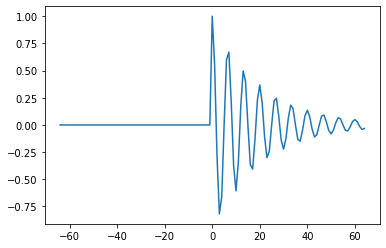

In [65]:
plt.plot(np.linspace(-M, M, 2*M + 1), y_M)

In [66]:
g0_M = sum(y_M * y_M)
g1_M = sum(y_M * right_shift(y_M, 1))
g2_M = sum(y_M * right_shift(y_M, 2))

print(g0_M)
print(g1_M)
print(g2_M) 

5.51572845853557
2.9444898382748934
-1.697215250519276


In [67]:
Phi_y = np.array([[g1_M, g2_M]]).T

Phi_x = np.array([[g0_M, g1_M], 
                  [g1_M, g0_M]])

In [68]:
x_vec = np.dot(np.linalg.inv(Phi_x), Phi_y)

In [69]:
x_vec[0]

array([0.97633453])

In [70]:
x_vec[1]

array([-0.82890635])

In [71]:
a1_est, a2_est = x_vec[0], x_vec[1]

In [72]:
r_est = np.sqrt(-a2_est)
a_est = -np.log(r_est)

In [73]:
theta_est = np.arccos(a1_est/2*r_est)

In [74]:
w0_est = theta_est

In [75]:
y_pred_est = np.empty(y.shape)
x_est = np.empty(y.shape)

for i in range(len(n)):
    y_pred_est[i] = a1_est * y[i-1] + a2_est * y[i-2]
    x_est[i] = y[i] - y_pred_est[i]

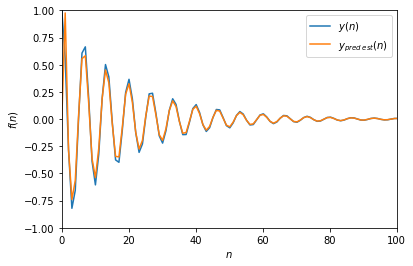

In [76]:
plt.plot(n, y, label='$y(n)$')
plt.plot(n, y_pred_est, label='$y_{pred \: est}(n)$')
#plt.plot(n, x_est, label='$x_{est}(n)$')
plt.axis([0, 100, -1, 1])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend()

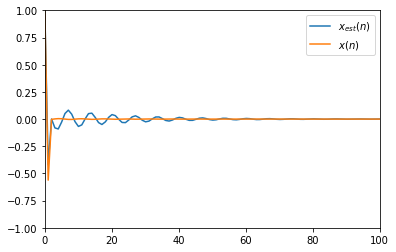

In [77]:
plt.plot(n, x_est, label='$x_{est}(n)$')
plt.plot(n, x, label='$x(n)$')
plt.axis([0, 100, -1, 1])
plt.legend()

In [78]:
E_x = sum([v ** 2 for v in x[:M]])
E_x_est = sum([v_est ** 2 for v_est in x_est[:M]])

In [79]:
print('x error energy: ', E_x)

x error energy:  1.3155456901405627


In [80]:
print('x_est error energy: ', E_x_est)

x_est error energy:  1.2313920196753023


As expected, the first method is a better predictor when you discard the first two samples as it finds the exact description of the coefficients in function of the input signal. The second method, however, uses an incomplete description of the signal, employing a windowing technique that is as good as many points are included. 

<b> 7. Repeat part 6 with one of the other windows discussed in Chapter 5 (e.g.
Hanning, Kaiser-Bessel) in place of the rectangular window. In other
words, for some other window type W, use 

$$\hat{y}^W_M(n) = 
\begin{cases} 
    W(n)y(n) &-M \leq n \leq M \\
    0 &\text{elsewhere}
\end{cases}
$$

To estimate $g^W_M(0)$, $g^W_M(1)$ and $g^W_M(2)$ and solve for the LPC predictor pole location. Compare the rectangular
window's pole estimates $a, \omega_)$ with these for your window for the cases
$M = 32, 64, 128, 256$.

</b>

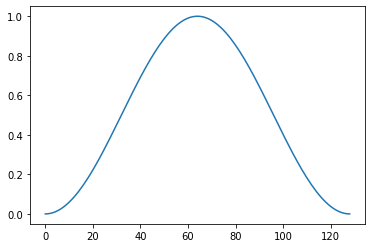

In [81]:
plt.plot(range(2*M+1), np.hanning(2*M+1))

In [82]:
y_hann = np.hanning(2*M+1) * y_M

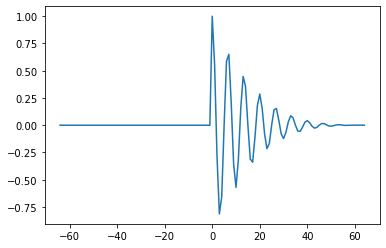

In [83]:
plt.plot(np.linspace(-M, M, 2*M+1), y_hann)

In [84]:
g0_W = sum(y_hann * y_hann)
g1_W = sum(y_hann * right_shift(y_hann, 1))
g2_W = sum(y_hann * right_shift(y_hann, 2))

Phi_y_W = np.array([[g1_W, g2_W]]).T

Phi_x_W = np.array([[g0_W, g1_W], 
                  [g1_W, g0_W]])

x_vec_W = np.dot(np.linalg.inv(Phi_x_W), Phi_y_W)

a1_est_W, a2_est_W = x_vec_W[0], x_vec_W[1]

r_est_W = np.sqrt(-a2_est_W)
a_est_W = -np.log(r_est_W)

theta_est_W = np.arccos(a1_est_W/2*r_est_W)
w0_est_W = theta_est_W

y_pred_est_W = np.empty(y.shape)
x_est_W = np.empty(y.shape)

for i in range(len(n)):
    y_pred_est_W[i] = a1_est_W * y[i-1] + a2_est_W * y[i-2]
    x_est_W[i] = y[i] - y_pred_est_W[i]

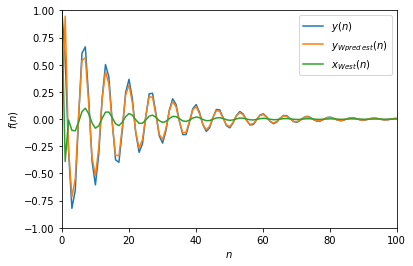

In [85]:
plt.plot(n, y, label='$y(n)$')
plt.plot(n, y_pred_est_W, label='$y_{Wpred \: est}(n)$')
plt.plot(n, x_est_W, label='$x_{West}(n)$')
plt.axis([0, 100, -1, 1])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend()

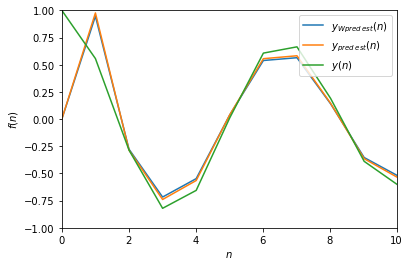

In [86]:
plt.plot(n, y_pred_est_W, label='$y_{Wpred \: est}(n)$')
plt.plot(n, y_pred_est, label='$y_{pred \: est}(n)$')
plt.plot(n, y, label='$y(n)$')
plt.axis([0, 10, -1, 1])
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend()

In [87]:
E_x_est_W = sum([v_est_W ** 2 for v_est_W in x_est_W[:M]])

In [88]:
print('x error energy: ', E_x)
print('x_est error energy: ', E_x_est)
print('x_est_W error energy: ', E_x_est_W)

x error energy:  1.3155456901405627
x_est error energy:  1.2313920196753023
x_est_W error energy:  1.234671939313578


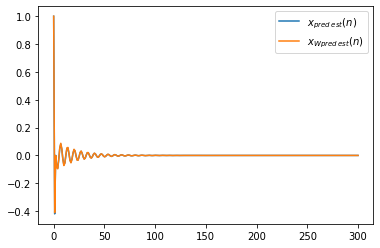

In [63]:
plt.plot(n, x_est, label='$x_{pred \: est}(n)$')
plt.plot(n, x_est_W, label='$x_{Wpred \: est}(n)$')
plt.legend()